<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/da15_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrame에서 날짜/시간(datetime) 타입 데이터 다루기

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SPX 데이터셋

In [8]:
file_path = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/examples/spx.csv'

In [9]:
spx = pd.read_csv(file_path)

In [10]:
spx.head()

,Date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75


In [11]:
spx.tail()

,Date,SPX
5467,2011-10-10 00:00:00,1194.89
5468,2011-10-11 00:00:00,1195.54
5469,2011-10-12 00:00:00,1207.25
5470,2011-10-13 00:00:00,1203.66
5471,2011-10-14 00:00:00,1224.58


In [12]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5472 non-null   object 
 1   SPX     5472 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.6+ KB


## 문자열 타입의 컬럼을 날짜/시간(datetime) 타입으로 변환

In [13]:
spx['Date'] = pd.to_datetime(spx['Date'])   # pd.to_datetime(spx['Date'], format='%Y-%m-%d %H:%M:%S')

In [17]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


In [18]:
spx.head()

,Date,SPX
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75


## CSV 파일에서 DataFrame을 생성할 때 날짜/시간 컬럼을 지정

In [25]:
# spx = pd.read_csv(file_path, parse_dates=['Date'])
# spx = pd.read_csv(file_path, parse_dates=['Date'], date_format='%Y-%m-%d %H:%M:%S')
spx = pd.read_csv(file_path, parse_dates=['Date'],
                  date_format={'Date': '%Y-%m-%d %H:%M:%S'})

In [26]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


In [27]:
spx.head()

,Date,SPX
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75


## 기관별(연도별/분기별/월별) 통계

In [28]:
# Date 컬럼 -> Index(row label)로 변환
spx_with_index = spx.set_index('Date')

In [30]:
spx_with_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


In [33]:
spx_with_index.head()   #> DatetimeIndex를 갖는 DataFrame

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [72]:
# 연도별 SPX의 평균
by_year = spx_with_index.resample('YE').mean()      # .resample 메서드는 뒤에 꼭 집계함수(mean, count, max, ...)와 같이 사용해야함!!

In [73]:
by_year.head()

,SPX
Date,
1990-12-31,334.123506
1991-12-31,376.186324
1992-12-31,415.747008
1993-12-31,451.614822
1994-12-31,460.416508


In [74]:
by_year.tail()

,SPX
Date,
2007-12-31,1477.184343
2008-12-31,1220.042055
2009-12-31,948.046389
2010-12-31,1139.965516
2011-12-31,1276.093015


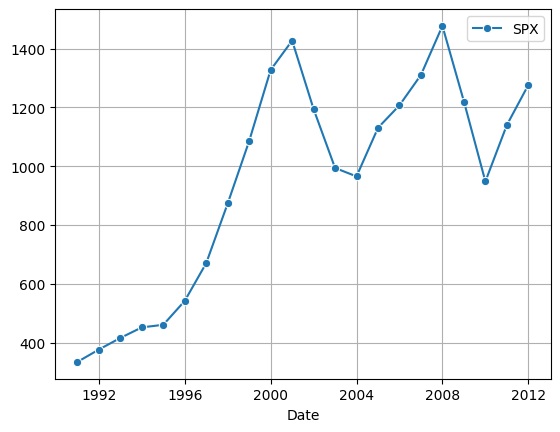

In [75]:
sns.lineplot(data=by_year, marker='o')
plt.grid()
plt.show()

In [76]:
# 분기별 SPX의 평균
by_quarter = spx_with_index.resample('QE').mean()

In [77]:
by_quarter.head()

,SPX
Date,
1990-03-31,334.751951
1990-06-30,349.796508
1990-09-30,335.881746
1990-12-31,316.562031
1991-03-31,352.282951


In [78]:
by_quarter.tail()

,SPX
Date,
2010-12-31,1204.585625
2011-03-31,1302.529032
2011-06-30,1318.332857
2011-09-30,1225.268438
2011-12-31,1171.356000


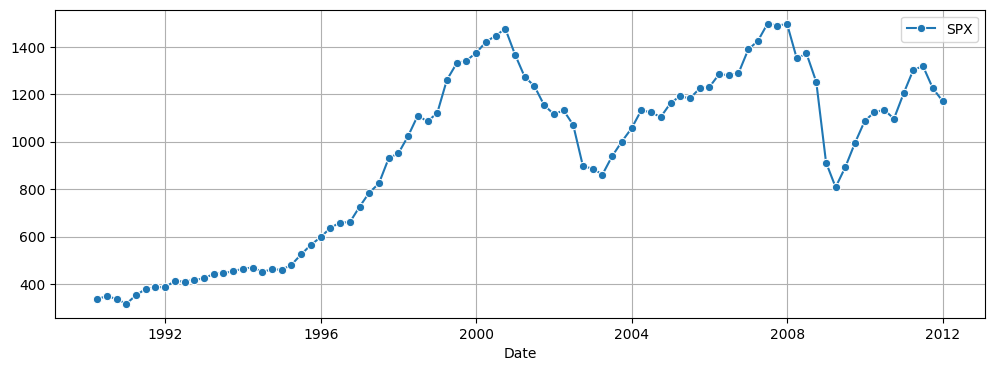

In [79]:
fig = plt.figure(figsize=(12,4))
sns.lineplot(data=by_quarter, marker='o')
plt.grid()
plt.show()

In [80]:
# 월별 SPX 평균
by_month = spx_with_index.resample('ME').mean()

In [81]:
by_month.head()

,SPX
Date,
1990-02-28,330.452632
1990-03-31,338.465000
1990-04-30,338.178000
1990-05-31,350.250000
1990-06-30,360.386667


In [82]:
by_month.tail()

,SPX
Date,
2011-06-30,1287.288636
2011-07-31,1325.184500
2011-08-31,1185.305652
2011-09-30,1173.879048
2011-10-31,1171.356000


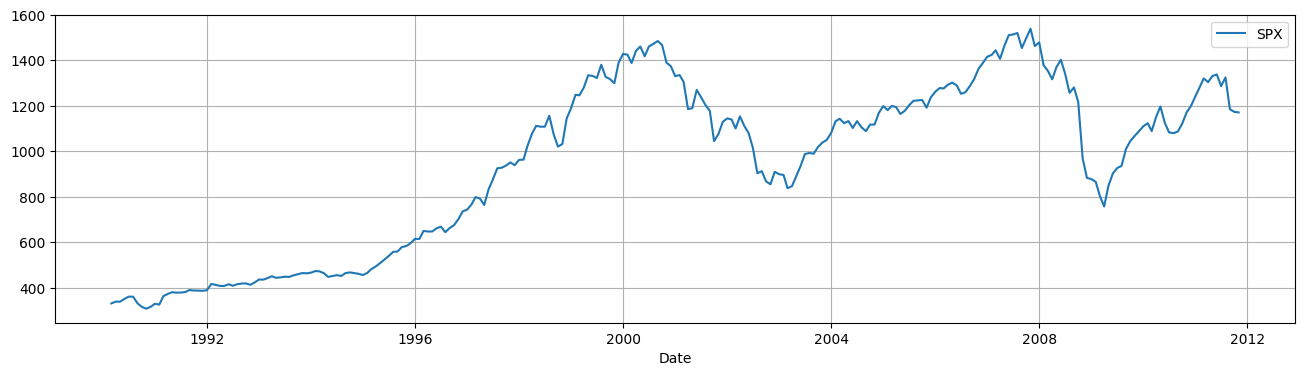

In [83]:
fig = plt.figure(figsize=(16,4))
sns.lineplot(data=by_month)
plt.grid()
plt.show()

In [84]:
# pd.read_csv() 함수 파라미터 : 컬럼을 인덱스로 설정
spx = pd.read_csv(file_path, parse_dates=['Date'], index_col=['Date'])

In [85]:
spx.head()

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [86]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


# banklist 데이터셋

* [banklist.csv](https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/banklist.csv)
* 데이터프레임을 생성할 때 날짜/시간 (datetime) 타입으로 변환할 수 있는 모든 컬럼들은 날짜/시간 타입으로 변환
* 연도별 파산한 은행 숫자, 시각화
* 분기별 파산한 은행 숫자, 시각화
* 월별 파산한 은행 숫자, 시각화
* 기간별 통계는 Closing Date를 기준으로.

In [87]:
banklist_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/banklist.csv'

## 날짜/시간 타입으로 변환

In [139]:
bank = pd.read_csv(banklist_path, parse_dates=['Closing Date', 'Updated Date'],
                   index_col=['Closing Date'])

/tmp/ipython-input-139-122871040.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank = pd.read_csv(banklist_path, parse_dates=['Closing Date', 'Updated Date'],
/tmp/ipython-input-139-122871040.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank = pd.read_csv(banklist_path, parse_dates=['Closing Date', 'Updated Date'],


In [141]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 555 entries, 2017-12-15 to 2000-10-13
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 30.4+ KB


In [142]:
bank.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Updated Date
Closing Date,,,,,,
2017-12-15,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-20
2017-10-13,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-20
2017-05-26,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-07-26
2017-05-05,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-07-26
2017-04-28,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-12-05


In [146]:
bank['Updated Date'].describe()

,Updated Date
count,555
mean,2014-06-07 23:41:50.270270208
min,2002-11-18 00:00:00
25%,2012-08-23 00:00:00
50%,2014-03-21 00:00:00
75%,2016-07-11 12:00:00
max,2018-02-12 00:00:00


# 기간별 resampling

In [173]:
def lineplot_resampled(rule):
    result = bank.resample(rule).size()     # .size()
    fig = plt.figure(figsize=(20,4))
    sns.lineplot(data=result, marker='o')
    plt.grid()
    plt.show()

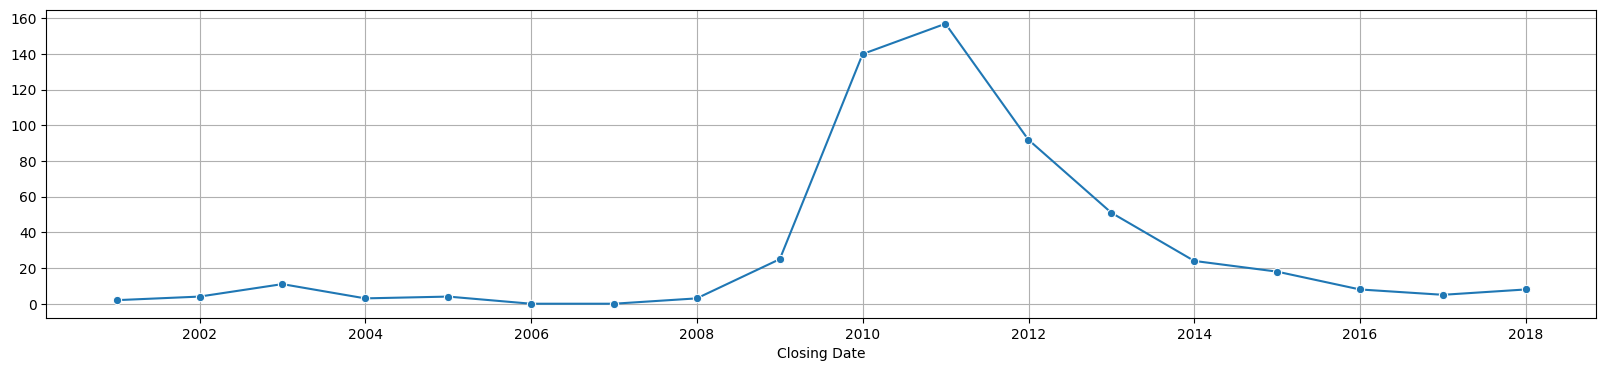

In [174]:
# 연도별 파산한 은행 시각화
lineplot_resampled('YE')

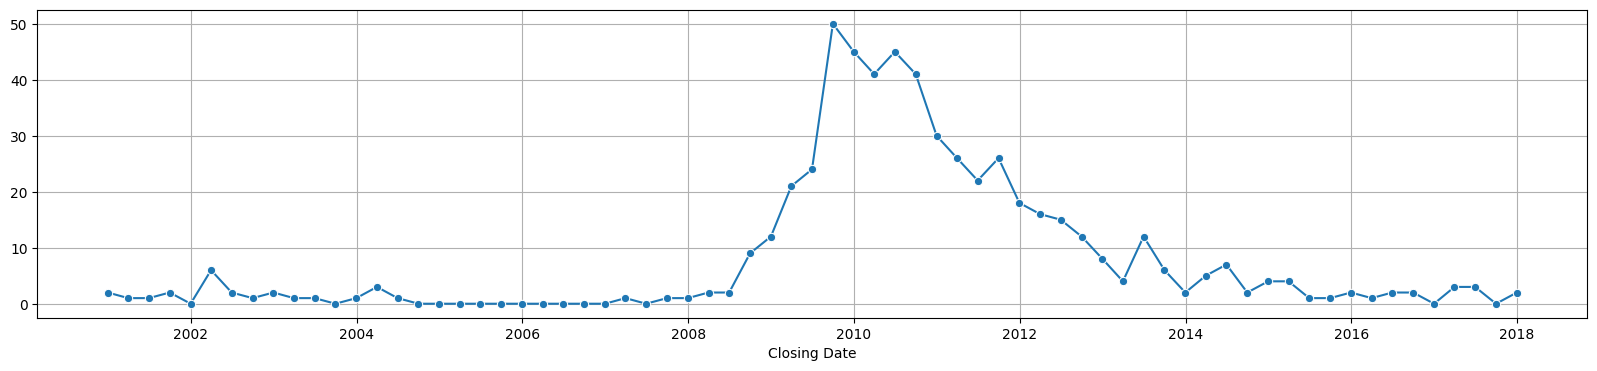

In [175]:
# 분기별 파산한 은행 시각화
lineplot_resampled('QE')

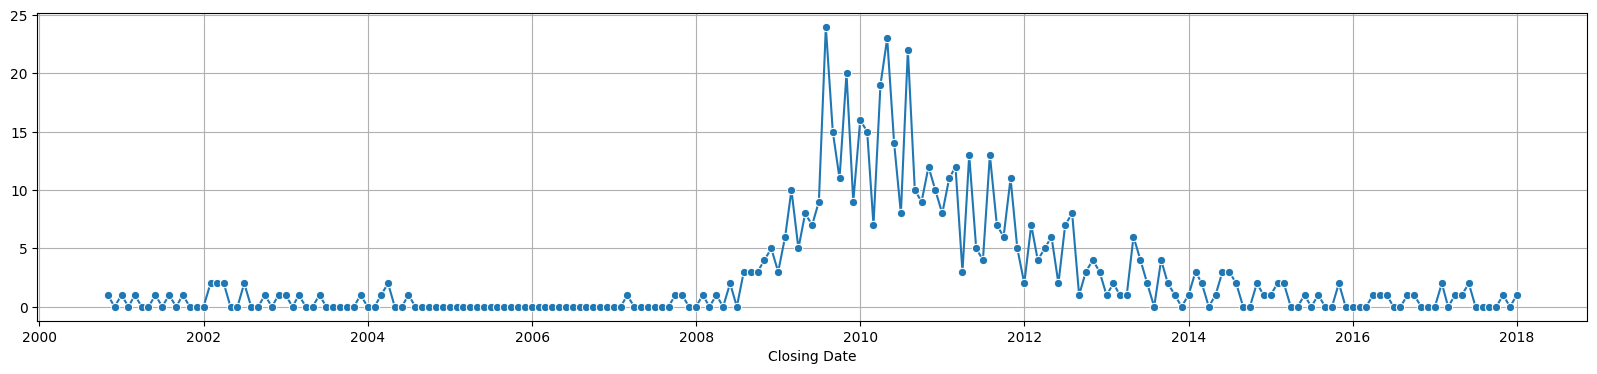

In [176]:
# 월별 파산한 은행 시각화
lineplot_resampled('ME')

## 연도별 파산한 은행 숫자, 시각화

In [149]:
# bank_index = bank.set_index(['Closing Date', 'Updated Date'])

In [150]:
# year_bank = bank.resample('YE', on='Closing Date').count()
year_bank = bank.resample('YE').count()

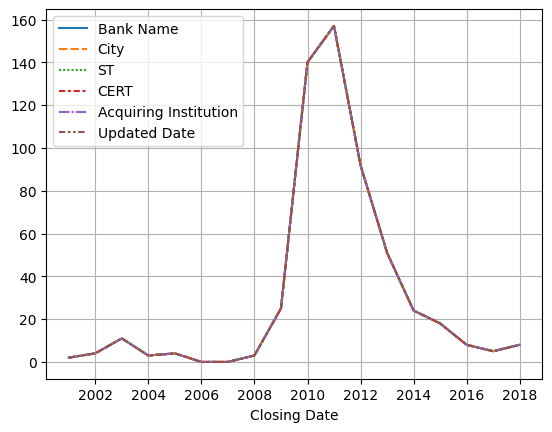

In [151]:
sns.lineplot(data=year_bank)
plt.grid()
plt.show()

## 분기별 파산한 은행, 시각화

In [153]:
# quarter_bank = bank.resample('QE', on='Closing Date').count()
quarter_bank = bank.resample('QE').count()

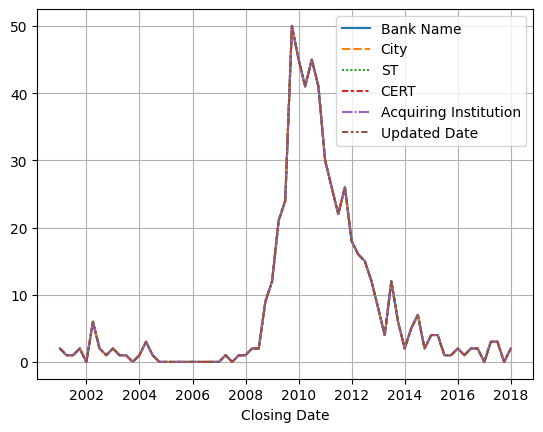

In [154]:
sns.lineplot(data=quarter_bank)
plt.grid()
plt.show()

## 월별 파산한 은행 숫자, 시각화

In [155]:
# month_bank = bank.resample('ME', on='Closing Date').count()
month_bank = bank.resample('ME').count()

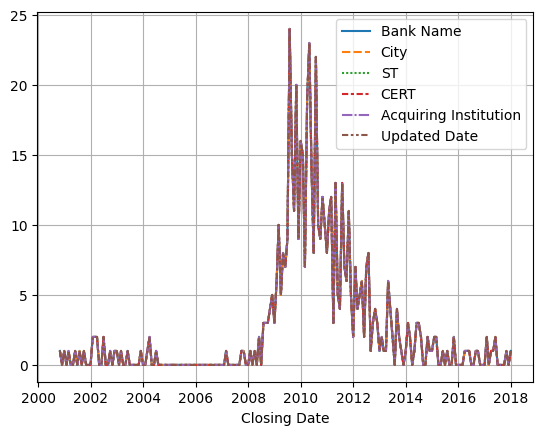

In [156]:
sns.lineplot(data=month_bank)
plt.grid()
plt.show()